# Ch03_Q14
## This problem focuses on the collinearity problem.

## (a) Perform the following commands in Python:
###     rng = np.random.default_rng(10)
###     x1 = rng.uniform(0, 1, size=100)
###     x2 = 0.5 * x1 + rng.normal(size=100) / 10
###     y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)
##    The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefcients?

In [5]:
import numpy as np

# Initialize the random number generator with a fixed seed
rng = np.random.default_rng(10)

# Generate random data for x1 and x2
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10

# Generate the dependent variable y based on the linear model
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

# The linear model is: y = 2 + 2 * x1 + 0.3 * x2 + ε
# β0 = 2, β1 = 2, β2 = 0.3, and ε is the random noise term
print("regression coefcients: β0 = 2, β1 = 2, β2 = 0.3")

regression coefcients: β0 = 2, β1 = 2, β2 = 0.3


## (b) What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.

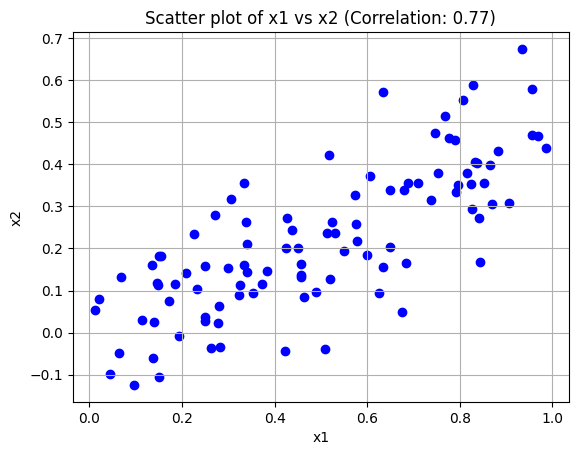

Correlation between x1 and x2: 0.77


In [6]:
import matplotlib.pyplot as plt

# 計算 x1 和 x2 之間的相關係數
correlation = np.corrcoef(x1, x2)[0, 1]

# 繪製 x1 與 x2 的散佈圖
plt.scatter(x1, x2, color='blue')
plt.title(f'Scatter plot of x1 vs x2 (Correlation: {correlation:.2f})')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

# 顯示相關係數
print(f'Correlation between x1 and x2: {correlation:.2f}')


## (c) Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are βˆ0, βˆ1, and βˆ2? How do these relate to the true β0, β1, and β2? Can you reject the null hypothesis H0 : β1 = 0? How about the null hypothesis H0 : β2 = 0?

In [7]:
import statsmodels.api as sm

# 設定 X 矩陣（包含截距項）
X = np.column_stack((x1, x2))
X = sm.add_constant(X)  # Adds the intercept term

# 建立線性回歸模型
model = sm.OLS(y, X).fit()

# 印出回歸結果
print(model.summary())

# 提取迴歸係數
beta_0_hat, beta_1_hat, beta_2_hat = model.params
print(f"Estimated coefficients: βˆ0 = {beta_0_hat:.2f}, βˆ1 = {beta_1_hat:.2f}, βˆ2 = {beta_2_hat:.2f}")
print("\nThe estimated values are close to the true values, but there is some discrepancy.")
print("\nThe null hypothesis H0: β1 = 0 can be rejected.")
print("\nThe null hypothesis H0: β2 = 0 cannot be rejected.")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           5.76e-08
Time:                        14:04:16   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.0

## (d)  Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis H0 : β1 = 0?

In [8]:
# Using only x1 to predict y
X_single = sm.add_constant(x1)  # Adding intercept to the model
model_single = sm.OLS(y, X_single).fit()  # Fit the model

# Print regression results
print(model_single.summary())

# Extract estimated coefficients for β0 and β1
beta_0_hat_single, beta_1_hat_single = model_single.params
print(f"Estimated coefficients using only x1: βˆ0 = {beta_0_hat_single:.2f}, βˆ1 = {beta_1_hat_single:.2f}")
print("\nThe null hypothesis H0 : β1 = 0 can be rejected, because p-value is small.")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           1.37e-08
Time:                        14:04:21   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9371      0.189     10.242      0.0

## (e) Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis H0 : β1 = 0?

In [9]:
# Using only x2 to predict y
X_x2_only = sm.add_constant(x2)  # Adding intercept to the model
model_x2_only = sm.OLS(y, X_x2_only).fit()  # Fit the model

# Print regression results
print(model_x2_only.summary())

# Extract estimated coefficients for β0 and β2
beta_0_hat_x2, beta_2_hat_x2 = model_x2_only.params
print(f"Estimated coefficients using only x2: βˆ0 = {beta_0_hat_x2:.2f}, βˆ2 = {beta_2_hat_x2:.2f}")
print("\nThe null hypothesis H0 : β1 = 0 can be rejected, because p-value is small.")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           7.43e-07
Time:                        14:04:25   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3239      0.154     15.124      0.0

## (f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.

In [10]:
print("These results are not contradictory; they show the different roles that x1 and x2 play in explaining y.")
print("When both variables are used together, x1 is more predictive, while x2 contributes little. However, when they are used individually, both have an effect on y.")

These results are not contradictory; they show the different roles that x1 and x2 play in explaining y.
When both variables are used together, x1 is more predictive, while x2 contributes little. However, when they are used individually, both have an effect on y.


## (g)  Suppose we obtain one additional observation, which was unfortunately mismeasured. We use the function np.concatenate() to add this additional observation to each of x1, x2 and y.
### x1 = np.concatenate([x1, [0.1]])
### x2 = np.concatenate([x2, [0.8]])
### y = np.concatenate([y, [6]])
## Re-ft the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

In [12]:
# Concatenate the new observation to the existing data
x1_new = np.concatenate([x1, [0.1]])
x2_new = np.concatenate([x2, [0.8]])
y_new = np.concatenate([y, [6]])

# Adding a constant for the intercept term
X_both = sm.add_constant(np.column_stack((x1_new, x2_new)))

# Re-fit model with both x1 and x2
model_both_new = sm.OLS(y_new, X_both).fit()

# Re-fit model with only x1
X_x1_new = sm.add_constant(x1_new)
model_x1_new = sm.OLS(y_new, X_x1_new).fit()

# Re-fit model with only x2
X_x2_new = sm.add_constant(x2_new)
model_x2_new = sm.OLS(y_new, X_x2_new).fit()

# Display the summary of the results
print("model with x1 and x2:")
print(model_both_new.summary())
print("\nmodel with only x1:")
print(model_x1_new.summary())
print("\nmodel with only x2:")
print(model_x2_new.summary())

model with x1 and x2:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           4.60e-08
Time:                        14:06:46   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0618      0.1